# Import packages

In [4]:
import os
from rdkit import Chem, rdBase

from rgroupinterm.rgroup_highlighting import plot_highlighted
from rgroupinterm.rgroupenumeration import EnumRGroups

rdBase.DisableLog('rdApp.*')

## Initialize and use intermediate generator
The generator needs a list of 2 rdkit molecules as input. It returns a dataframe with a column for the intermediate molecule and SMILES.

In [9]:
smiles = ['Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CCCC5)cc34)cc2)cn1',
 'COC1CN(C(=O)c2ccc3[nH]nc(Cc4ccc5c(cnn5C)c4)c3c2)C1']

generator = EnumRGroups()
mols = [Chem.MolFromSmiles(x) for x in smiles]
df_interm, core = generator.generate_intermediates(mols)
intermediates = df_interm['Intermediate'].tolist()

By default the generator only does R-group enumeration. With the variables permutate and insert_small the generator can also explore intermediates for molecules with only one R-group change. 

In [7]:
smiles = ['CN1CC(C[N]1)c2ccc(CC3[N]Nc4c3cc(C)cc4)cc2',
 'CN1CC(C[N]1)c2ccc(CC3[N]Nc4c3cc(C(C)=O)cc4)cc2']

generator = EnumRGroups(permutate=True, insert_small=True)
mols = [Chem.MolFromSmiles(x) for x in smiles]
df_interm, core = generator.generate_intermediates(mols)
intermediates = df_interm['Intermediate'].tolist()

# Pruning
Depending on the input molecules and settings used, intermediate generation can yield a lot of molecules. To facilate chosing which perturbations to run a pruning algorithm was adopted into the code. 

Molecules can be scored using:
- tanimoto score
- lomap score
- rocs score
- heavy atoms

Multiple methods are provided for combining the scores of the intermediate compared to both parents. We recommend using the harmonic mean transformer.

In [10]:
from rgroupinterm.pruners import BasePruner, TanimotoScorer, HarmonicMeanTransformer
from rdkit import Chem

df_interm['Parent_1'] = mols[0]
df_interm['Parent_2'] = mols[1]
df_interm['Pair'] = 0

# apply pruning
pruner = BasePruner(
    [TanimotoScorer(transformer=HarmonicMeanTransformer(exponent=4))], topn=2)
pruned_df = pruner(df_interm)

for column in ['Intermediate', 'Parent_1', 'Parent_2']:
    pruned_df[column] = pruned_df[column].apply(lambda x: Chem.MolToSmiles(x))

pruned_df

Intermediate  \
Pair                                                        
0    1  COC1CN(C(=O)c2ccc3[nH]nc(Cc4ccc(-c5cnn(C)c5)cc...   
     2    Cn1ncc2cc(Cc3n[nH]c4ccc(C(=O)N5CCCC5)cc34)ccc21   

                                                   SMILES  \
Pair                                                        
0    1  COC1CN(C(=O)c2ccc3[nH]nc(Cc4ccc(-c5cnn(C)c5)cc...   
     2    Cn1ncc2cc(Cc3n[nH]c4ccc(C(=O)N5CCCC5)cc34)ccc21   

                                                 Parent_1  \
Pair                                                        
0    1  CN1C=C(C2=CC=C(CC3=NNC4=CC=C(C(=O)N5CCCC5)C=C4...   
     2  CN1C=C(C2=CC=C(CC3=NNC4=CC=C(C(=O)N5CCCC5)C=C4...   

                                                 Parent_2  Pair  \
Pair                                                              
0    1  COC1CN(C(=O)C2=CC=C3NN=C(CC4=CC=C5C(=C4)C=NN5C...     0   
     2  COC1CN(C(=O)C2=CC=C3NN=C(CC4=CC=C5C(=C4)C=NN5C...     0   

        raw_score_Tanimoto    score  
Pair                                 
0    1             0.00258  0.00258  
     2             0.00244  0.00244

## Visualization
plot_highlighted can be used to visualize the generated intermediates

In [11]:
# running this code requires downloading the fep benchmark set from https://github.com/JenkeScheen/fep_intermediate_generation
if not os.path.exists('./fep_intermediate_generation'):
    path  = "./" 
    clone = "git clone https://github.com/JenkeScheen/fep_intermediate_generation.git" 

    os.chdir(path) # Specifying the path where the cloned project needs to be copied
    os.system(clone) # Cloning

Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC(O)C5)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CCNCC5)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 CC(=O)Nc1ccc2[nH]nc(Cc3ccc(-c4cnn(C)c4)cc3)c2c1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(-c5cc(N)ccn5)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 CNC(=O)c1ccc2[nH]nc(Cc3cccc(C)c3)c2c1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CCCCC5)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)N5CC(F)(F)C5)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(=O)NC5CC5)cc34)cc2)cn1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(C(N)=O)cc34)cc2)cn1 CNC(=O)c1ccc2[nH]nc(Cc3ccc(-c4cnn(C)c4)cc3)c2c1
Cn1cc(-c2ccc(Cc3n[nH]c4ccc(

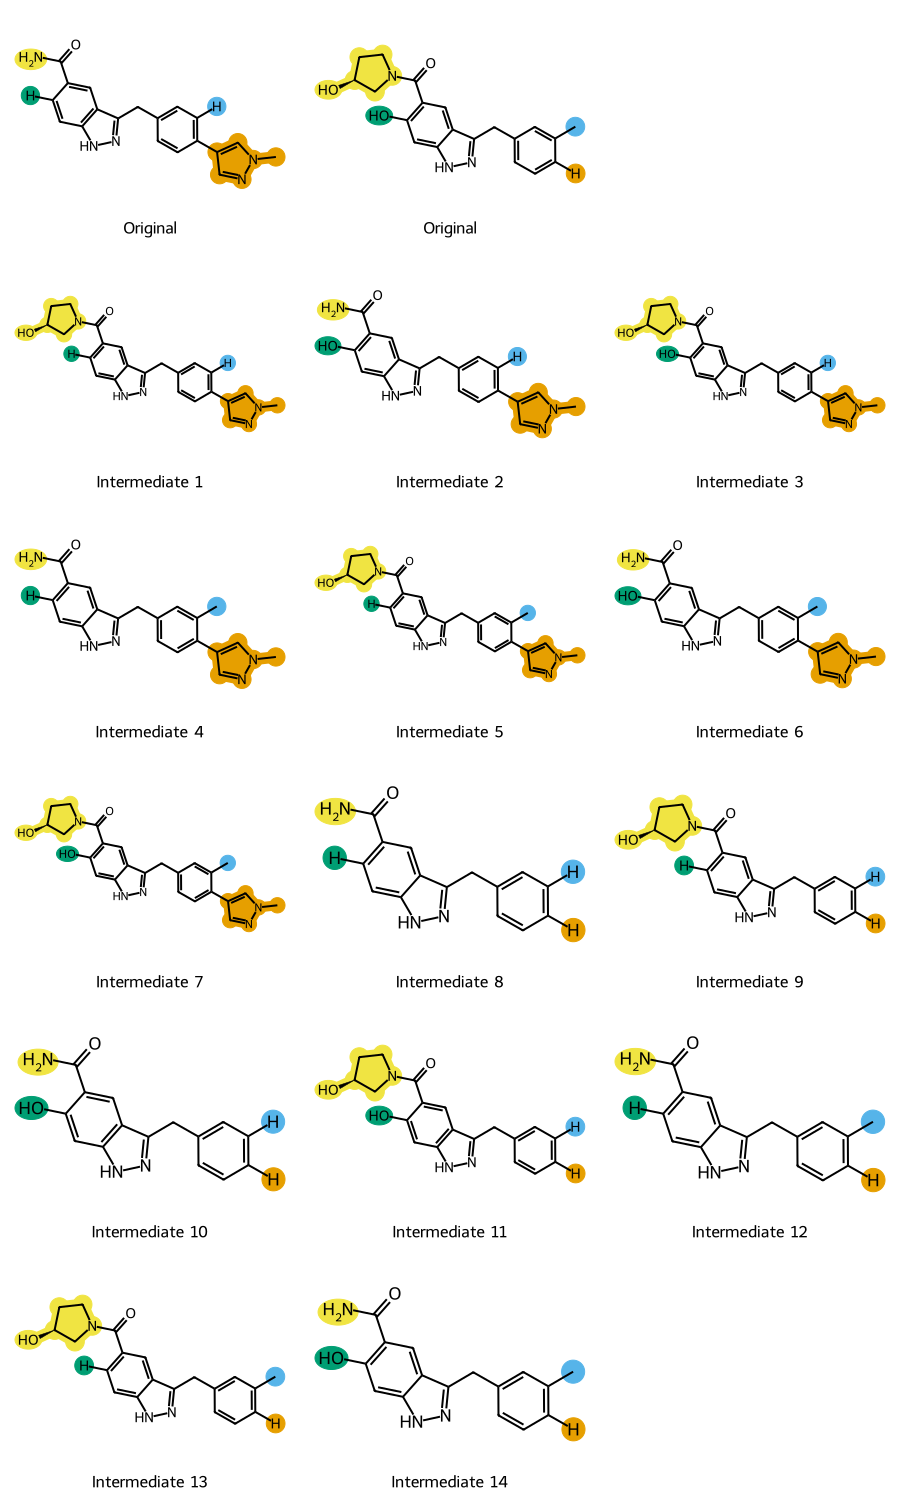

In [12]:
import glob
from itertools import combinations
dir = 'cdk8'
path = "fep_intermediate_generation/ligands/"
addendum = '*.sdf'
mols = []
for file in glob.glob(path + dir + '/' + addendum):
    mol = Chem.rdmolfiles.SDMolSupplier(file)[0]
    mols.append(mol)

num = 0
for i, (liga, ligb) in enumerate(combinations(mols, 2)):
    # if Chem.MolToSmiles(ligb) == 'Clc1ccc2c(c1)[C@H]1OCCC[C@H]1[C@H](c1ccccc1)N2': continue
    print(Chem.MolToSmiles(liga), Chem.MolToSmiles(ligb))
    generator = EnumRGroups()
    liga = Chem.Mol(liga)
    ligb = Chem.Mol(ligb)
    df_interm, core = generator.generate_intermediates([liga, ligb])
    if len(df_interm) > 2:
        generated_interm = df_interm['Intermediate'].tolist()
        num += 1
        if num > 1:
            image = plot_highlighted(liga, ligb, generated_interm, core)
            image
            display(image)
            break